In [301]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import nan,NaN,NAN
import tensorflow as tf

In [126]:
train_set=pd.read_excel('Data_Train.xlsx')
train_set.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [127]:
test_set=pd.read_excel('Data_Test.xlsx')
test_set.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [128]:
print('Shape of Train set',train_set.shape)
print('Shape of Test set',test_set.shape)

Shape of Train set (6019, 13)
Shape of Test set (1234, 12)


In [129]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [130]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [131]:
train_set.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [132]:
# Categorical Features

In [133]:
cat_features=train_set.columns[train_set.dtypes==object]
cat_features

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [134]:
#NON Categorical Feature

In [135]:
ncat_features=train_set.columns[train_set.dtypes!=object]
ncat_features

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [136]:
train_set[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 9 columns):
Name            6019 non-null object
Location        6019 non-null object
Fuel_Type       6019 non-null object
Transmission    6019 non-null object
Owner_Type      6019 non-null object
Mileage         6017 non-null object
Engine          5983 non-null object
Power           5983 non-null object
New_Price       824 non-null object
dtypes: object(9)
memory usage: 423.3+ KB


In [137]:
train_set[ncat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 4 columns):
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2)
memory usage: 188.2 KB


In [138]:
train_set['Seats'].isna().value_counts()

False    5977
True       42
Name: Seats, dtype: int64

In [139]:
test_set['Seats'].isna().value_counts()

False    1223
True       11
Name: Seats, dtype: int64

In [140]:
train_set['Seats'].value_counts(dropna=False)

5.0     5014
7.0      674
8.0      134
4.0       99
NaN       42
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [141]:
test_set['Seats'].value_counts(dropna=False)

5.0     1033
7.0      122
8.0       36
4.0       20
NaN       11
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [142]:
train_set['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Maruti Swift Dzire VDI                 34
Honda City 1.5 S MT                    34
Maruti Swift VDI BSIV                  31
                                       ..
Hyundai Verna CRDi 1.6 AT SX Plus       1
Volvo XC90 2007-2015 D5 AT AWD          1
Ford Endeavour Hurricane LE             1
BMW 7 Series 730Ld Eminence             1
Hyundai Tucson 2.0 e-VGT 2WD AT GLS     1
Name: Name, Length: 1876, dtype: int64

In [143]:
train_set['Location'].value_counts(dropna=False)

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [144]:
test_set['Location'].value_counts(dropna=False)

Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64

In [145]:
train_set['Owner_Type'].value_counts(dropna=False)

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [146]:
test_set['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [147]:
train_set['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [148]:
test_set['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [149]:
train_set['Year'].value_counts(dropna=False)

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [150]:
test_set['Year'].value_counts(dropna=False)

2015    185
2016    145
2013    142
2014    128
2017    122
2011    113
2012    110
2010     65
2018     63
2009     54
2008     33
2007     23
2019     17
2006     11
2005     11
2004      4
2003      3
2002      3
2000      1
1996      1
Name: Year, dtype: int64

In [151]:
train_set['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [152]:
test_set['Transmission'].value_counts()

Manual       905
Automatic    329
Name: Transmission, dtype: int64

In [153]:
len(train_set[train_set['Power']=='null bhp'])

107

In [154]:
len(test_set[test_set['Power']=='null bhp'])

22

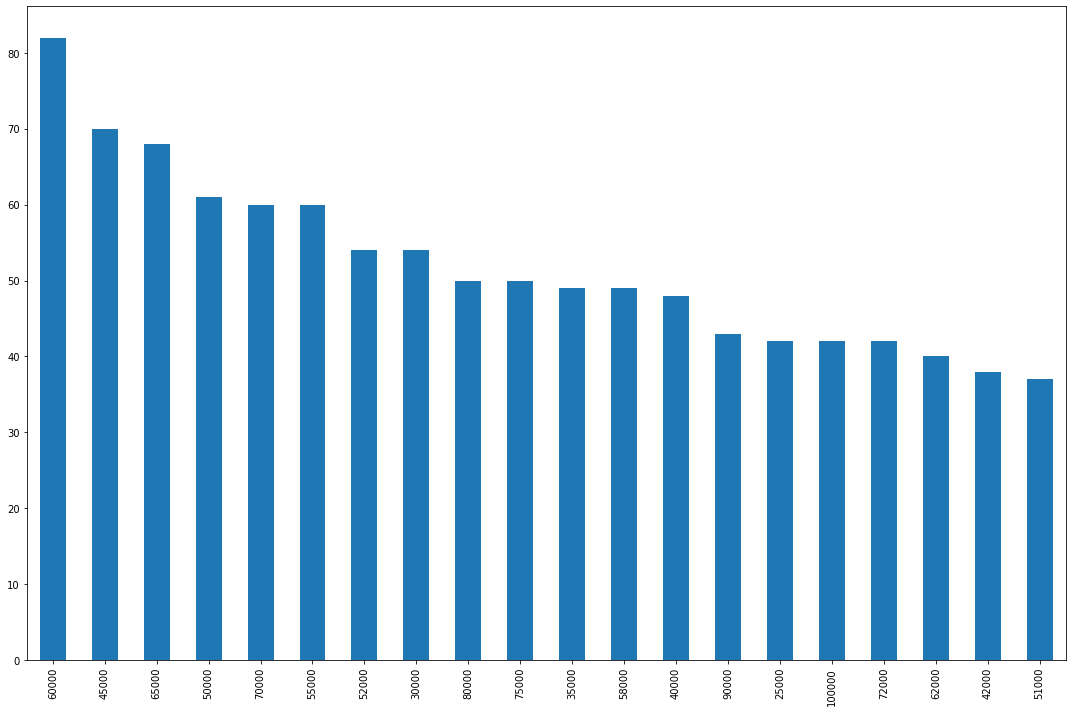

In [155]:
plt.figure(figsize=(15,10))
train_set['Kilometers_Driven'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.tight_layout()

In [156]:
ls1=list(train_set['Name'])
model_train=[]
company_train=[]
for i in ls1:
    company_train.append(i.split()[0])
    model_train.append(' '.join(i.split()[1:]))
    

In [157]:
train_set['Model']=model_train
train_set['Company']=company_train
train_set.drop('Name',axis=1,inplace=True)

In [158]:
train_set=train_set[['Company','Model','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price']]

In [159]:
ls1=list(test_set['Name'])
model_test=[]
comapny_test=[]
for i in ls1:
    comapny_test.append(i.split()[0])
    model_test.append(' '.join(i.split()[1:]))

In [160]:
test_set['Model']=model_test
test_set['Company']=comapny_test
test_set.drop('Name',axis=1,inplace=True)


In [161]:
test_set=test_set[['Company','Model','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']]

In [162]:
train_set['Company'].value_counts().index.sort_values()

Index(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [163]:
test_set['Company'].value_counts().index.sort_values()

Index(['Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'OpelCorsa', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'],
      dtype='object')

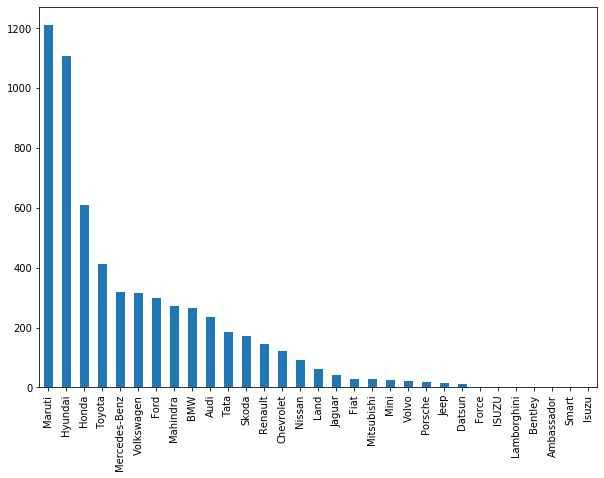

In [164]:
plt.figure(figsize=(10,7))
train_set['Company'].value_counts().plot(kind='bar')

In [165]:
train_set['Model'].value_counts().index.sort_values()

Index(['1 Series 118d Base', '1 Series 118d Sport Line', '1000 AC',
       '3 Series 2005-2011 325i Sedan', '3 Series 318i Sedan', '3 Series 320d',
       '3 Series 320d Corporate Edition', '3 Series 320d Dynamic',
       '3 Series 320d GT Luxury Line', '3 Series 320d Highline',
       ...
       'i20 Sportz 1.4 CRDi', 'i20 Sportz AT 1.4', 'i20 Sportz Diesel',
       'i20 Sportz Option', 'i20 Sportz Option 1.2',
       'i20 Sportz Option Diesel', 'i20 Sportz Petrol', 'redi-GO S',
       'redi-GO T', 'redi-GO T Option'],
      dtype='object', length=1876)

In [166]:
test_set['Model'].value_counts().index.sort_values()

Index(['1.4Gsi', '3 Series 320d', '3 Series 320d Luxury Line',
       '3 Series 320d Prestige', '3 Series 320d Sport',
       '3 Series GT 320d Luxury Line', '3 Series GT 320d Sport Line',
       '3 Series Luxury Line', '370Z AT', '5 Series 2003-2012 520d',
       ...
       'i20 Asta Option 1.4 CRDi', 'i20 Magna', 'i20 Magna 1.2',
       'i20 Magna 1.4 CRDi', 'i20 Magna Optional 1.2', 'i20 Sportz 1.2',
       'i20 Sportz AT 1.4', 'i20 Sportz Option 1.2', 'i20 new Sportz AT 1.4',
       'redi-GO T Option'],
      dtype='object', length=768)

In [167]:
ls1=list(train_set['Mileage'])
mil_train=[]
for i in ls1:
    mil_train.append(float(str(i).split()[0])) 
train_set['Mileage']=mil_train
ls1=list(test_set['Mileage'])
mil_test=[]
for i in ls1:
    mil_test.append(float(str(i).split()[0]))
test_set['Mileage']=mil_test    

In [168]:
ls1=list(train_set['Engine'])
eng_train=[]
for i in ls1:
    eng_train.append(float(str(i).split()[0]))
train_set['Engine']=eng_train
ls1=list(test_set['Engine'])
eng_test=[]
for i in ls1:
    eng_test.append(float(str(i).split()[0]))
test_set['Engine']=eng_test   

In [169]:
# convert type of Power

In [170]:
train_set[train_set['Power']=='null bhp'].count()

Company              107
Model                107
Location             107
Year                 107
Kilometers_Driven    107
Fuel_Type            107
Transmission         107
Owner_Type           107
Mileage              107
Engine               107
Power                107
Seats                103
New_Price              0
Price                107
dtype: int64

In [171]:
test_set[test_set['Power']=='null bhp'].count()

Company              22
Model                22
Location             22
Year                 22
Kilometers_Driven    22
Fuel_Type            22
Transmission         22
Owner_Type           22
Mileage              22
Engine               22
Power                22
Seats                22
New_Price             0
dtype: int64

In [172]:
ls1=list(train_set['Power'])
pow_train=[]
for i in ls1:
    if i!='null bhp':
        pow_train.append(float(str(i).split()[0]))
    elif i=='null bhp':
        pow_train.append(0)
train_set['Power']=pow_train        
ls1=list(test_set['Power'])
pow_test=[]
for i in ls1:
    if i!='null bhp':
        pow_test.append(float(str(i).split()[0]))
    else:
        pow_test.append(0)
test_set['Power']=pow_test        

In [173]:
train_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [174]:
test_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,0.00,5.0,NaN
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN


In [175]:
train_set['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [176]:
train_set['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [177]:
print('Average Price for Automatic Cars is '+ str(np.round(np.average(train_set[train_set['Transmission']=='Automatic']['Price'].values))))
print('Average Price for Manual Cars is '+ str(np.round(np.average(train_set[train_set['Transmission']=='Manual']['Price'].values))))

Average Price for Automatic Cars is 20.0
Average Price for Manual Cars is 5.0


In [178]:
print(train_set.groupby(by='Owner_Type')['Price'].mean().sort_values())

Owner_Type
Fourth & Above    3.280000
Third             5.007257
Second            7.599886
First             9.962445
Name: Price, dtype: float64


In [179]:
ls1=list(train_set['Owner_Type'])
own_train=[]
for i in ls1:
    if i=='First':
        own_train.append(1)
    elif i=='Second':
        own_train.append(2)
    elif i=='Third':
        own_train.append(3)
    elif i=='Fourth & Above':
        own_train.append(4)
train_set['Owner_Type']=own_train
train_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74


In [180]:
ls1=list(test_set['Owner_Type'])
own_train=[]
for i in ls1:
    if i=='First':
        own_train.append(1)
    elif i=='Second':
        own_train.append(2)
    elif i=='Third':
        own_train.append(3)
    elif i=='Fourth & Above':
        own_train.append(4)
test_set['Owner_Type']=own_train
test_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,1,32.26,998.0,58.20,4.0,NaN
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,2,24.70,796.0,47.30,5.0,NaN
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,1,13.68,2393.0,147.80,7.0,25.27 Lakh
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,1,23.59,1364.0,0.00,5.0,NaN
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,1,18.50,1197.0,82.85,5.0,NaN


In [181]:
ls1=list(train_set['Transmission'])
own_train=[]
for i in ls1:
    if i=='Automatic':
        own_train.append(1)
    else :
        own_train.append(2)
train_set['Transmission']=own_train
train_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,2,1,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,2,1,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,2,1,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,2,1,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968.0,140.80,5.0,NaN,17.74


In [182]:
ls1=list(test_set['Transmission'])
own_train=[]
for i in ls1:
    if i=='Automatic':
        own_train.append(1)
    else :
        own_train.append(2)
test_set['Transmission']=own_train
test_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,2,1,32.26,998.0,58.20,4.0,NaN
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,2,2,24.70,796.0,47.30,5.0,NaN
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,2,1,13.68,2393.0,147.80,7.0,25.27 Lakh
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,2,1,23.59,1364.0,0.00,5.0,NaN
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,2,1,18.50,1197.0,82.85,5.0,NaN


In [183]:
train_set.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)

Fuel_Type
Electric    12.875000
Diesel      12.840605
Petrol       5.701100
CNG          3.516786
LPG          2.487000
Name: Price, dtype: float64

In [184]:
#train_set[train_set['Fuel_Type']=='']

In [185]:
test_set[test_set['Fuel_Type']=='CNG']

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,2,1,32.26,998.0,58.2,4.0,NaN
368,Hyundai,Santro Xing GLS CNG,Bangalore,2011,43985,CNG,2,1,11.88,1086.0,62.1,5.0,NaN
519,Maruti,Alto K10 LXI CNG,Kochi,2015,47490,CNG,2,1,32.26,998.0,58.2,4.0,NaN
769,Maruti,Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,2,1,32.26,998.0,58.2,4.0,4.66 Lakh
907,Maruti,Eeco 5 STR With AC Plus HTR CNG,Mumbai,2017,15500,CNG,2,1,15.10,1196.0,73.0,5.0,NaN
939,Maruti,Alto 800 CNG LXI,Kolkata,2013,14311,CNG,2,1,30.46,796.0,47.3,5.0,NaN


In [186]:
ls1=list(train_set['Fuel_Type'])
train_fuel=[]
for i in ls1:
    if i=='Electric':
        train_fuel.append(1)
    elif i=='Diesel':
        train_fuel.append(2)
    elif i=='Petrol':
        train_fuel.append(3)
    elif i=='CNG':
        train_fuel.append(4)
    else:
        train_fuel.append(5)
train_set['Fuel_Type']=train_fuel
ls1=list(test_set['Fuel_Type'])
train_fuel=[]
for i in ls1:
    if i=='Electric':
        train_fuel.append(1)
    elif i=='Diesel':
        train_fuel.append(2)
    elif i=='Petrol':
        train_fuel.append(3)
    elif i=='CNG':
        train_fuel.append(4)
    else:
        train_fuel.append(5)
        
test_set['Fuel_Type']=train_fuel        

In [187]:
train_set.columns

Index(['Company', 'Model', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

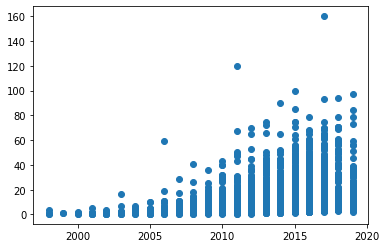

In [188]:
plt.scatter(train_set['Year'],train_set['Price'])

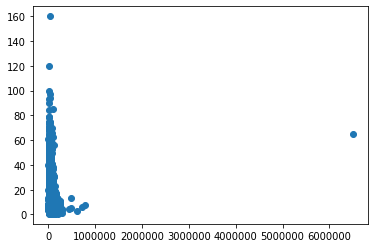

In [189]:
plt.scatter(train_set['Kilometers_Driven'],train_set['Price'])

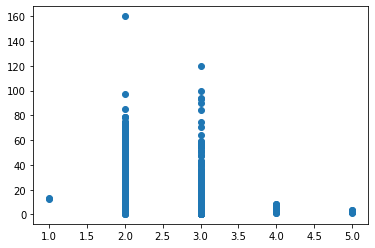

In [190]:
plt.scatter(train_set['Fuel_Type'],train_set['Price'])

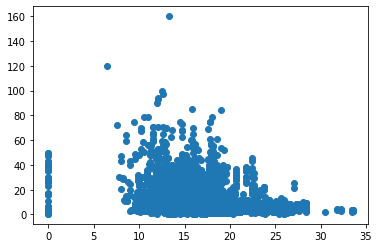

In [191]:
plt.scatter(train_set['Mileage'],train_set['Price'])

In [192]:
train_set[train_set['Mileage']>30].count()

Company              14
Model                14
Location             14
Year                 14
Kilometers_Driven    14
Fuel_Type            14
Transmission         14
Owner_Type           14
Mileage              14
Engine               14
Power                14
Seats                14
New_Price             8
Price                14
dtype: int64

In [193]:
train_set[train_set['Kilometers_Driven']>3000000].count()

Company              1
Model                1
Location             1
Year                 1
Kilometers_Driven    1
Fuel_Type            1
Transmission         1
Owner_Type           1
Mileage              1
Engine               1
Power                1
Seats                1
New_Price            0
Price                1
dtype: int64

In [194]:
test_set['Kilometers_Driven'].max()

350000

In [195]:
test_set[test_set['Mileage']>30].count()

Company              4
Model                4
Location             4
Year                 4
Kilometers_Driven    4
Fuel_Type            4
Transmission         4
Owner_Type           4
Mileage              4
Engine               4
Power                4
Seats                4
New_Price            1
dtype: int64

In [196]:
test_set.drop('New_Price',axis=1,inplace=True)
train_set.drop('New_Price',axis=1,inplace=True)

In [197]:
train_set.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,4,2,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,2,2,1,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,3,2,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,2,2,1,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,1,2,15.20,1968.0,140.80,5.0,17.74


In [198]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Company              6019 non-null object
Model                6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int64
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5983 non-null float64
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 611.4+ KB


In [199]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Company              1234 non-null object
Model                1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null int64
Transmission         1234 non-null int64
Owner_Type           1234 non-null int64
Mileage              1234 non-null float64
Engine               1224 non-null float64
Power                1224 non-null float64
Seats                1223 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 115.8+ KB


In [200]:
train_set.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [201]:
test_set.Location.unique()

array(['Delhi', 'Coimbatore', 'Mumbai', 'Hyderabad', 'Pune', 'Jaipur',
       'Chennai', 'Kochi', 'Bangalore', 'Kolkata', 'Ahmedabad'],
      dtype=object)

In [202]:
loc_train=pd.get_dummies(train_set['Location'])
train_set=pd.concat([train_set,loc_train],axis=1)
train_set.drop('Location',axis=1,inplace=True)
loc_test=pd.get_dummies(test_set['Location'])
test_set=pd.concat([test_set,loc_test],axis=1)
test_set.drop('Location',axis=1,inplace=True)

In [203]:
train_set.head()

,Company,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti,Wagon R LXI CNG,2010,72000,4,2,1,26.60,998.0,58.16,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai,Creta 1.6 CRDi SX Option,2015,41000,2,2,1,19.67,1582.0,126.20,...,0,0,0,0,0,0,0,0,0,1
2,Honda,Jazz V,2011,46000,3,2,1,18.20,1199.0,88.70,...,0,1,0,0,0,0,0,0,0,0
3,Maruti,Ertiga VDI,2012,87000,2,2,1,20.77,1248.0,88.76,...,0,1,0,0,0,0,0,0,0,0
4,Audi,A4 New 2.0 TDI Multitronic,2013,40670,2,1,2,15.20,1968.0,140.80,...,0,0,1,0,0,0,0,0,0,0


In [204]:
test_set.head()

,Company,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti,Alto K10 LXI CNG,2014,40929,4,2,1,32.26,998.0,58.20,...,0,0,0,1,0,0,0,0,0,0
1,Maruti,Alto 800 2016-2019 LXI,2013,54493,3,2,2,24.70,796.0,47.30,...,0,0,1,0,0,0,0,0,0,0
2,Toyota,Innova Crysta Touring Sport 2.4 MT,2017,34000,2,2,1,13.68,2393.0,147.80,...,0,0,0,0,0,0,0,0,1,0
3,Toyota,Etios Liva GD,2012,139000,2,2,1,23.59,1364.0,0.00,...,0,0,0,0,1,0,0,0,0,0
4,Hyundai,i20 Magna,2014,29000,3,2,1,18.50,1197.0,82.85,...,0,0,0,0,0,0,0,0,1,0


In [205]:
sorted(train_set.Company.unique())

['Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [206]:
sorted(test_set.Company.unique())

['Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Ford',
 'Hindustan',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'OpelCorsa',
 'Porsche',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [207]:
trai_co=pd.get_dummies(train_set['Company'])
train_set=pd.concat([train_set,trai_co],axis=1)
train_set.drop('Company',axis=1,inplace=True)
train_set.head()

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,Wagon R LXI CNG,2010,72000,4,2,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,0,0
1,Creta 1.6 CRDi SX Option,2015,41000,2,2,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,0
2,Jazz V,2011,46000,3,2,1,18.20,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,0,0
3,Ertiga VDI,2012,87000,2,2,1,20.77,1248.0,88.76,7.0,...,0,0,0,0,0,0,0,0,0,0
4,A4 New 2.0 TDI Multitronic,2013,40670,2,1,2,15.20,1968.0,140.80,5.0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
test_set.head()

,Company,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti,Alto K10 LXI CNG,2014,40929,4,2,1,32.26,998.0,58.20,...,0,0,0,1,0,0,0,0,0,0
1,Maruti,Alto 800 2016-2019 LXI,2013,54493,3,2,2,24.70,796.0,47.30,...,0,0,1,0,0,0,0,0,0,0
2,Toyota,Innova Crysta Touring Sport 2.4 MT,2017,34000,2,2,1,13.68,2393.0,147.80,...,0,0,0,0,0,0,0,0,1,0
3,Toyota,Etios Liva GD,2012,139000,2,2,1,23.59,1364.0,0.00,...,0,0,0,0,1,0,0,0,0,0
4,Hyundai,i20 Magna,2014,29000,3,2,1,18.50,1197.0,82.85,...,0,0,0,0,0,0,0,0,1,0


In [209]:
test_co=pd.get_dummies(test_set['Company'])
test_set=pd.concat([test_set,test_co],axis=1)
test_set.head()
test_set.drop('Company',axis=1,inplace=True)

In [210]:
test_set.head()

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Alto K10 LXI CNG,2014,40929,4,2,1,32.26,998.0,58.20,4.0,...,0,0,0,0,0,0,0,0,0,0
1,Alto 800 2016-2019 LXI,2013,54493,3,2,2,24.70,796.0,47.30,5.0,...,0,0,0,0,0,0,0,0,0,0
2,Innova Crysta Touring Sport 2.4 MT,2017,34000,2,2,1,13.68,2393.0,147.80,7.0,...,0,0,0,0,0,0,0,1,0,0
3,Etios Liva GD,2012,139000,2,2,1,23.59,1364.0,0.00,5.0,...,0,0,0,0,0,0,0,1,0,0
4,i20 Magna,2014,29000,3,2,1,18.50,1197.0,82.85,5.0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
test_set.shape

(1234, 50)

In [212]:
train_set.shape

(6019, 53)

In [213]:
train_set=train_set[['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
                     'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad',
       'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Ambassador', 'Audi',
       'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo','Price']]


In [214]:
train_set.columns

Index(['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Ambassador', 'Audi', 'BMW',
       'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo', 'Price'],
      dtype='object')

In [215]:
test_set.columns

Index(['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Audi', 'BMW', 'Bentley',
       'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Hindustan', 'Honda', 'Hyundai',
       'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [216]:
train_set['Hindustan']=np.zeros((train_set.shape[0],1))
train_set['OpelCorsa']=np.zeros((train_set.shape[0],1))
test_set['Ambassador']=np.zeros((test_set.shape[0],1))
test_set['Force']=np.zeros((test_set.shape[0],1))
test_set['Lamborghini']=np.zeros((test_set.shape[0],1))
test_set['Smart']=np.zeros((test_set.shape[0],1))

In [217]:
train_set.shape

(6019, 55)

In [218]:
test_set.shape

(1234, 54)

In [219]:
#train_set[train_set['Model']=='E Verito D4'].fillna(16)
#train_set[train_set['Mileage']].fillna(17,inplace=True)

In [220]:
train_set.groupby('Fuel_Type')

In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaler.fit(train_set[['Kilometers_Driven','Engine']])

In [222]:
train_set[train_set['Mileage'].isna()].replace(to_replace=[NaN],value=18)

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,Price,Hindustan,OpelCorsa
4446,E Verito D4,2016,50000,1,1,1,18.0,72.0,41.0,5.0,...,0,0,0,0,0,0,0,13.00,0.0,0.0
4904,Prius 2009-2016 Z4,2011,44000,1,1,1,18.0,1798.0,73.0,5.0,...,0,0,0,0,1,0,0,12.75,0.0,0.0


In [223]:
train_set[train_set['Mileage'].isna()]

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,Price,Hindustan,OpelCorsa
4446,E Verito D4,2016,50000,1,1,1,NaN,72.0,41.0,5.0,...,0,0,0,0,0,0,0,13.00,0.0,0.0
4904,Prius 2009-2016 Z4,2011,44000,1,1,1,NaN,1798.0,73.0,5.0,...,0,0,0,0,1,0,0,12.75,0.0,0.0


In [224]:
train_set['Mileage'].replace(to_replace=[NaN],value=18,inplace=True)

In [225]:
train_set[train_set['Mileage'].isna()]

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,Price,Hindustan,OpelCorsa


In [226]:
test_set['Seats'].isna().value_counts()

False    1223
True       11
Name: Seats, dtype: int64

In [227]:
train_set['Seats'].isna().value_counts()

False    5977
True       42
Name: Seats, dtype: int64

In [228]:
train_set['Seats'].replace(to_replace=[NaN],value=5.0,inplace=True)


In [229]:
train_set['Seats'].isna().value_counts()

False    6019
Name: Seats, dtype: int64

In [230]:
test_set[test_set['Seats'].isna()]

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Ambassador,Force,Lamborghini,Smart
23,Laura 1.8 TSI Ambition,2009,72000,3,2,2,17.50,NaN,NaN,NaN,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
522,Etios Liva Diesel TRD Sportivo,2012,56600,2,2,1,23.59,NaN,NaN,NaN,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
525,i20 new Sportz AT 1.4,2012,58000,3,1,2,15.00,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
614,TUV 300 P4,2016,27000,2,2,1,0.00,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
624,5 Series 520d Sedan,2009,150000,2,1,2,18.48,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
632,Swift 1.3 VXi,2015,36009,3,2,1,16.10,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
658,Punto 1.4 Emotion,2010,65000,3,2,3,14.60,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
666,Swift 1.3 VXi,2010,115000,3,2,2,16.10,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
861,5 Series 520d Sedan,2009,95000,2,1,2,18.48,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
883,Etios Liva V,2012,59311,3,2,1,18.30,NaN,NaN,NaN,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0


In [231]:
test_set['Seats'].replace(to_replace=[NaN],value=5,inplace=True)
test_set.iloc[614].replace(to_replace=5,value=7,inplace=True)

/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [232]:
train_set['Power'].isna().value_counts()

False    5983
True       36
Name: Power, dtype: int64

In [233]:
test_set['Power'].isna().value_counts()

False    1224
True       10
Name: Power, dtype: int64

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [235]:
train_set.columns
train_set=train_set[['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Ambassador', 'Audi', 'BMW',
       'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen','Volvo','Hindustan', 'OpelCorsa'
        ,'Price']]
train_set.columns

Index(['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Ambassador', 'Audi', 'BMW',
       'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo', 'Hindustan', 'OpelCorsa', 'Price'],
      dtype='object')

In [236]:
test_set=test_set[['Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Ambassador', 'Audi', 'BMW',
       'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen','Volvo','Hindustan', 'OpelCorsa']]

In [237]:
test_set.shape

(1234, 54)

In [238]:
train_set.shape

(6019, 55)

In [239]:
test_set.Power.isna().value_counts()

False    1224
True       10
Name: Power, dtype: int64

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X=train_set.drop(axis=1,labels=['Model','Price','Power','Engine'])
y=train_set['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)

In [242]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [243]:
print(mean_squared_error(y_test,pred))
print(lr.score(X_test,y_test)*100)

39.70041305864427
69.42057268545756


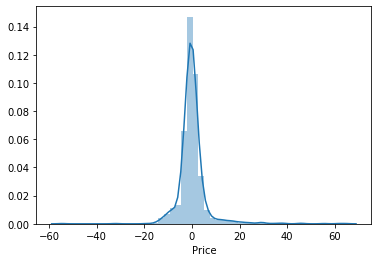

In [244]:
sns.distplot((y_test-pred))

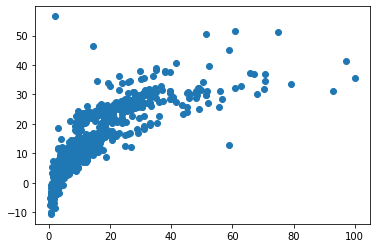

In [245]:
plt.scatter(y_test,pred)

In [246]:
linlasso=Lasso(alpha=0.001,max_iter=10000).fit(X_train,y_train)
print(linlasso.score(X_test,y_test))


0.6908498297556116


In [247]:
print(train_set['Power'].dropna().mean())
print(train_set['Engine'].dropna().mean())
print(test_set['Power'].dropna().mean())
print(test_set['Engine'].dropna().mean())

111.22763162293163
1621.276449941501
108.39645833333334
1593.5849673202615


In [248]:
ls=list(train_set['Power'])
count=0
for i in ls:
    if i!=np.NaN:
        count+=1
test_set['Power'].isna().value_counts()       

False    1224
True       10
Name: Power, dtype: int64

In [249]:
train_set['Power'].fillna(value=110,inplace=True)
train_set['Engine'].replace(to_replace=[NaN],value=1600,inplace=True)
test_set['Power'].replace(to_replace=[NaN],value=108,inplace=True)
test_set['Engine'].replace(to_replace=[NaN],value=1590,inplace=True)

/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [250]:
train_set['Model'].nunique()

1876

In [251]:
test_set['Model'].nunique()

768

In [252]:
t=[]
for i in test_set['Model'].unique():
    count=0
    for j in train_set['Model'].unique():
        if i==j:
            count=1
    if count==0:
        t.append(i)
len(t)        

165

In [253]:
z=[]
for i in train_set['Model'].unique():
    count=0
    for j in test_set['Model'].unique():
        if i==j:
            count=1
    if count==0:
        z.append(i)
len(z)        

1273

In [254]:
x=pd.get_dummies(train_set['Model'])
train_set=pd.concat([train_set,x],axis=1)
train_set.drop('Model',axis=1,inplace=True)
train_set.shape

(6019, 1930)

In [255]:
x=pd.get_dummies(test_set['Model'])
test_set=pd.concat([test_set,x],axis=1)
test_set.drop('Model',axis=1,inplace=True)
test_set.shape

(1234, 821)

In [256]:
for i in t:
    train_set[i]=np.zeros((train_set.shape[0]))

In [257]:
train_set.shape

(6019, 2095)

In [258]:
for i in z:
    test_set[i]=np.zeros((test_set.shape[0]))

In [259]:
test_set.shape

(1234, 2094)

In [260]:
test_set=test_set[train_set.drop('Price',axis=1).columns]

In [262]:
from sklearn.model_selection import train_test_split
X=train_set.drop('Price',axis=1)
y=train_set['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)

In [263]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [264]:
lr.score(X_train,y_train)

0.9674904279857028

In [265]:
pred=lr.predict(test_set)
pred=np.abs(pred)
pred[pred<0]

array([], dtype=float64)

In [273]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X=train_set.drop('Price',axis=1)
y=train_set['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)

In [274]:
lr=Lasso(alpha=0.001)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1494.57919175399, tolerance: 67.53440494418315
  positive)


0.950537090773235

In [275]:
#lr.score(X_test,y_test)

In [276]:
from sklearn.linear_model import Ridge

In [277]:
from sklearn.preprocessing import PolynomialFeatures

In [278]:
lin=Ridge(alpha=2)
lin.fit(X_train,y_train)
#lin.score(X_test,y_test)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [279]:
lin.score(X_train,y_train)

0.9148635164484515

In [284]:
X_train.shape
print(test_set.shape)

(1234, 2094)


In [285]:
pred=lin.predict(test_set)
pred=np.abs(pred)
pred

array([ 1.06085094,  1.36550643, 16.39303156, ...,  2.07040682,
        4.15433037, 22.88795879])

In [286]:
Submission=pd.DataFrame(data=pred,columns=['Price'])
Submission.to_excel('Submission2.xlsx')

In [287]:
#train_set['Kilometers_Driven']=(train_set['Kilometers_Driven']/(train_set['Kilometers_Driven'].max()))*1000

In [288]:
X=train_set.drop(['Price'],axis=1)
y=train_set['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=40)

In [289]:
lr=LinearRegression().fit(X_train,y_train)
lr.score(X_train,y_train)
#lr.score(X_test,y_test)*100
pred=lr.predict(test_set)

In [290]:
pred=np.abs(pred)
Submission=pd.DataFrame(data=pred,columns=['Price'])
Submission.to_excel('Submission_.xlsx')

In [291]:
sample=pd.read_excel('Sample_submission.xlsx')
sample.head()

,Price
0,55.02
1,56.46
2,34.61
3,16.89
4,50.48


In [292]:
test_set.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ahmedabad,...,S Class 2005 2013 320 L,Alto XCITE,Rover Discovery 4 TDV6 Auto Diesel,Verna Transform VTVT with Audio,Vitara Brezza ZDi Plus AMT,Superb Petrol Ambition,Tiago 1.05 Revotorq XT Option,EcoSport 1.5 Petrol Ambiente,Compass 1.4 Sport,Elite i20 Magna Plus
0,2014,40929,4,2,1,32.26,998.0,58.20,4.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,3,2,2,24.70,796.0,47.30,5.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,2,2,1,13.68,2393.0,147.80,7.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,139000,2,2,1,23.59,1364.0,0.00,5.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,29000,3,2,1,18.50,1197.0,82.85,5.0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
pred=lr.predict(test_set)
pred=abs(pred)
pred

array([ 1.90484866,  1.48751571, 13.78347756, ...,  2.85865655,
        4.11217997, 21.80052703])

In [294]:
Submission=pd.DataFrame(data=pred,columns=['Price'])

In [295]:
!pwd

/Users/guptadhruv51/Desktop/Machine Hack/Participants_Data_Used_Cars


In [296]:
Submission.to_excel('Submission.xlsx')

Using TensorFlow backend.


In [298]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [299]:
print(X_train.shape)
print(y_train.shape)
adam=Adam(lr=0.2)

(4213, 2094)
(4213,)


In [312]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2094,),activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation=tf.nn.relu)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               268160    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)               

In [313]:
model.compile(optimizer='adam',loss='mae')

In [314]:
history=model.fit(x=X_train,y=y_train,batch_size=64,epochs=20,validation_data=(X_test,y_test),verbose=2)

W0203 00:18:11.600939 4444995008 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 4213 samples, validate on 1806 samples
Epoch 1/20
4213/4213 - 1s - loss: 9.5675 - val_loss: 9.5094
Epoch 2/20
4213/4213 - 1s - loss: 9.4644 - val_loss: 9.5094
Epoch 3/20
4213/4213 - 1s - loss: 9.4629 - val_loss: 9.5094
Epoch 4/20
4213/4213 - 1s - loss: 9.4709 - val_loss: 9.5094
Epoch 5/20
4213/4213 - 1s - loss: 9.4714 - val_loss: 9.5094
Epoch 6/20
4213/4213 - 1s - loss: 9.4655 - val_loss: 9.5094
Epoch 7/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 8/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 9/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 10/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 11/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 12/20
4213/4213 - 1s - loss: 9.4672 - val_loss: 9.5094
Epoch 13/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 14/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 15/20
4213/4213 - 1s - loss: 9.4666 - val_loss: 9.5094
Epoch 16/20
4213/4213 - 1s - loss: 9.4666 - va

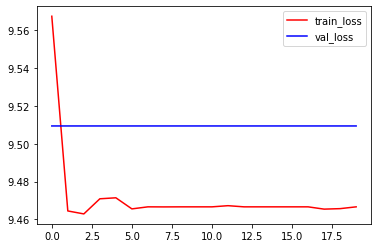

In [315]:
plt.figure()
plt.plot(history.history['loss'],'r',label='train_loss')
plt.plot(history.history['val_loss'],'b',label='val_loss')
plt.legend()

In [ ]:
pred=model.predict(test_set.drop('Model',axis=1))

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeRegressor()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)